In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from phase_retrieval import fienup_phase_retrieval

In [2]:
np.pad(np.ones((4,4)), 2, 'constant')
image = imageio.imread('cameraman.png', mode='F')
image.shape
x = np.array([-1. + 3.j, -2. + 0.j, 0. ])
np.logical_not(x > 0)
x = np.array([1. - 1.j, -2. ])
x>0
np.abs(np.random.rand(4))

C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_8772\479155286.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.png', mode='F')


array([0.69037886, 0.81706616, 0.63997738, 0.17235925])

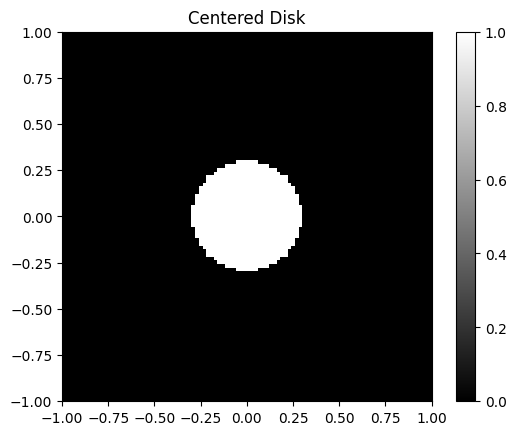

In [13]:
# Define the size of the image
size = 100
radius = 30

# Create a grid of points
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X, Y = np.meshgrid(x, y)

# Define the centered disk
disk = (X**2 + Y**2) <= (radius / size)**2

# Create the image with ones in the disk and zeros outside
imagedisk = np.zeros((size, size))
imagedisk[disk] = 1

# Plot the image
plt.imshow(imagedisk, cmap='gray', extent=(-1, 1, -1, 1))
plt.title('Centered Disk')
plt.colorbar()
plt.show()


C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_8772\3093823373.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('test.png', mode='F')


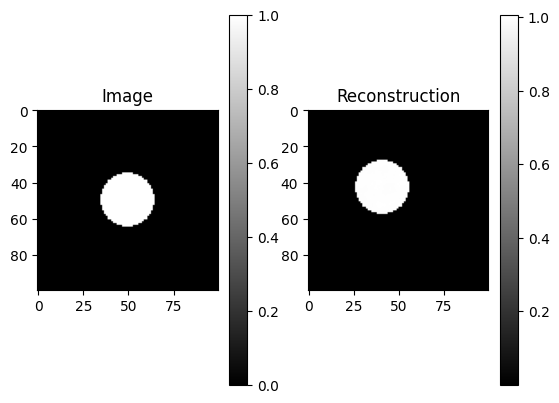

In [14]:
np.random.seed(1)


#print(image.shape)
image = np.ones((150, 150))
image = np.pad(image, 25, 'constant')

image = imageio.imread('test.png', mode='F')

image = imagedisk

magnitudes = np.abs(np.fft.fft2(image))
result = fienup_phase_retrieval(magnitudes, steps=500,
                                verbose=False)

plt.show()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.colorbar()

plt.subplot(122)
plt.imshow(result, cmap='gray');
plt.title('Reconstruction')
plt.colorbar()
plt.show()


C:\Users\NICK-TECH\AppData\Local\Temp\ipykernel_8452\1595805280.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cameraman.png', mode='F')


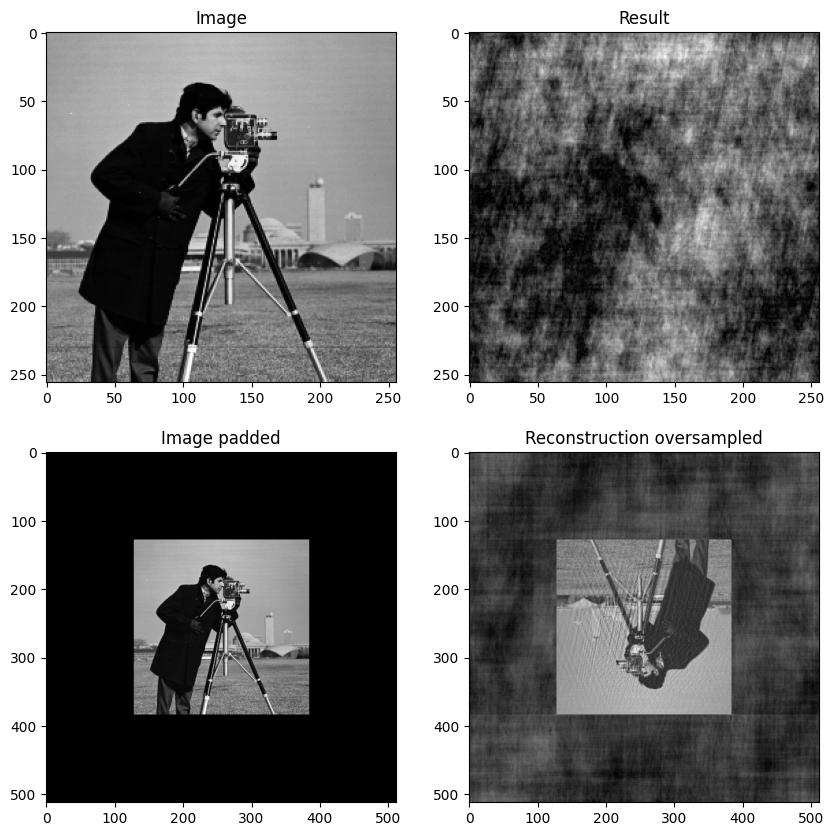

In [4]:
np.random.seed(12345)
image = imageio.imread('cameraman.png', mode='F')
magnitudes = np.abs(np.fft.fft2(image))
result = fienup_phase_retrieval(magnitudes,
                                steps=1000,
                                verbose=False)

image_padded = np.pad(image, 128, 'constant')
magnitudes_oversampled = np.abs(np.fft.fft2(image_padded))
mask = np.pad(np.ones((256,256)), 128, 'constant')
result_oversampled = fienup_phase_retrieval(magnitudes_oversampled,
                                            steps=1000,
                                            mask=mask,
                                            verbose=False)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.subplot(222)
plt.imshow(result, cmap='gray')
plt.title('Result')
plt.subplot(223)
plt.imshow(image_padded, cmap='gray')
plt.title('Image padded')
plt.subplot(224)
plt.imshow(result_oversampled, cmap='gray');
plt.title('Reconstruction oversampled')
plt.show()
